In [215]:
import pprint
import matplotlib
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pp = pprint.PrettyPrinter()

In [216]:
def readfile(filename):
    with open(filename) as f:
        lines = f.readlines()
    return lines

In [232]:
def get_max_power(lines):
    lines = [float(l.split('\t')[5]) for l in lines]
    return (min(lines), max(lines))

In [245]:
matplotlib.rcParams['figure.figsize'] = [16, 8]

def myplot(datalist):
    
    for k in datalist.keys():
        x = np.arange(len(datalist[k]))
        xticks = np.array([t[0][3:-4] for t in datalist[k]])
        y = np.array([t[1][0] for t in datalist[k]])
        
        plt.xticks(x, xticks)
        plt.plot(x, y, label='Min')
        plt.title(k)
        
        y = np.array([t[1][1] for t in datalist[k]])
        plt.plot(x, y, label='Max')
        plt.title(k)
        
        plt.xlabel('Mote Id')
        plt.ylabel('Power (W)')
        
        plt.grid(b=True)
        plt.legend()
        fig = plt.figure(figsize=(12,18))
        plt.show()

In [246]:
# folderpaths = ['test/cci2/', 'test/cci4/'] # test folders

folderpaths = ['motes30/cci2/consumption/', 'motes30/cci4/consumption/', 'motes30/cci8/consumption/']

datalist = {}
for path in folderpaths:
    allfiles = [f for f in listdir(path) if isfile(join(path, f))]
    allfiles = [f for f in allfiles if f.find('oml') != -1]
    allfiles.sort()
    
    datalist[path] = []
    
    # find culmulative power from each file
    start_value = 1
    cutoff_value = 10
    
    for onefile in allfiles:
        lines = readfile(path + onefile)
        lines = lines[9:]
        
        mpower = get_max_power(lines)
        datalist[path].append((onefile, mpower))

Prints minimum and maximum value of power for each mote.

{'motes30/cci2/consumption/': [('m3-10.oml', (0.122504, 0.157679)),
                               ('m3-13.oml', (0.125313, 0.14742)),
                               ('m3-17.oml', (0.122626, 0.150473)),
                               ('m3-2.oml', (0.121771, 0.146198)),
                               ('m3-23.oml', (0.122015, 0.147542)),
                               ('m3-250.oml', (0.123725, 0.156336)),
                               ('m3-253.oml', (0.121038, 0.162443)),
                               ('m3-254.oml', (0.12055, 0.146687)),
                               ('m3-261.oml', (0.123725, 0.157679)),
                               ('m3-265.oml', (0.121038, 0.144366)),
                               ('m3-266.oml', (0.120916, 0.15316)),
                               ('m3-27.oml', (0.126412, 0.15426)),
                               ('m3-275.oml', (0.125191, 0.14974)),
                               ('m3-278.oml', (0.12458, 0

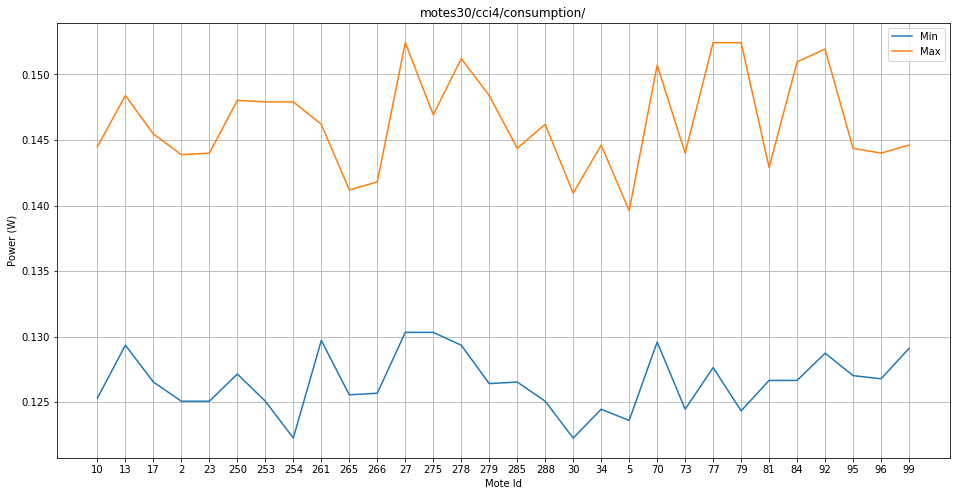

<Figure size 864x1296 with 0 Axes>

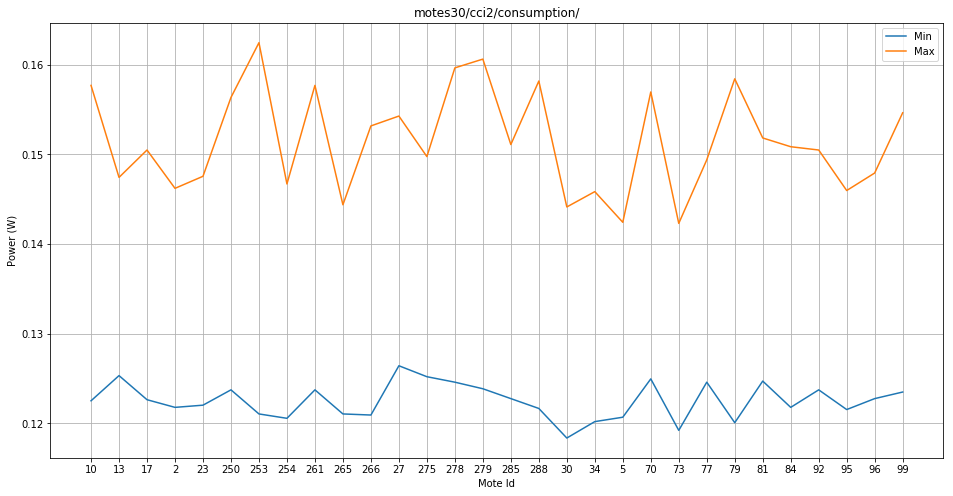

<Figure size 864x1296 with 0 Axes>

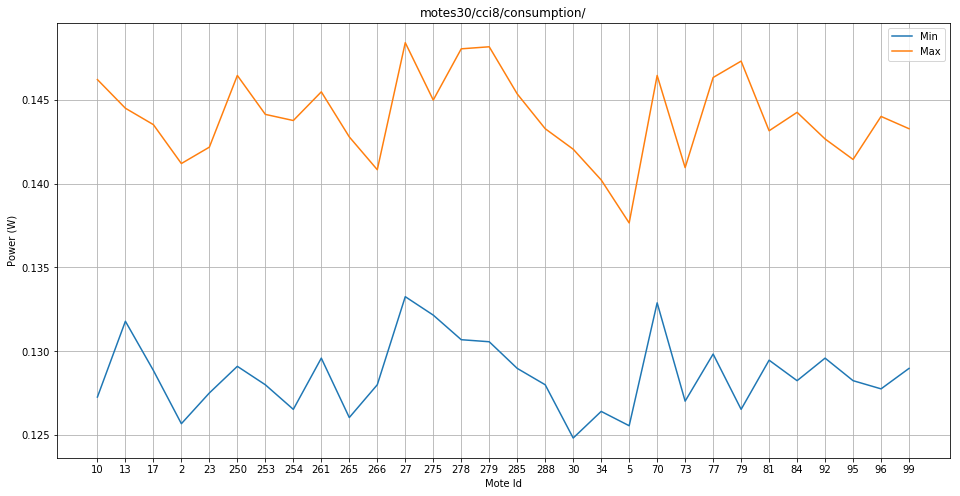

<Figure size 864x1296 with 0 Axes>

In [247]:
print 'Prints minimum and maximum value of power for each mote.\n'
pp.pprint(datalist)
myplot(datalist)